In [1]:
# Dependencies and Setup
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_clinical_combine = pd.merge(study_results, mouse_metadata, how="outer", on ="Mouse ID")
# Display the data table for preview
mouse_clinical_combine.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
summarystats= mouse_clinical_combine [["Drug Regimen", "Tumor Volume (mm3)"]]
groupBydata = summarystats.groupby(["Drug Regimen"])

summaryDF = pd.DataFrame({
    "Mean": groupBydata["Tumor Volume (mm3)"].mean().map("{:.2f}".format),
    "Median":groupBydata["Tumor Volume (mm3)"].median().map("{:.2f}".format),
    "Mode":groupBydata["Tumor Volume (mm3)"].agg(pd.Series.mode).map("{:.2f}".format),
    "Variance":groupBydata["Tumor Volume (mm3)"].var().map("{:.2f}".format),
    "Standard Deviation":groupBydata["Tumor Volume (mm3)"].std().map("{:.2f}".format),
    "SEM":groupBydata["Tumor Volume (mm3)"].sem().map("{:.2f}".format),
})
summaryDF.head()

,Mean,Median,Mode,Variance,Standard Deviation,SEM
Drug Regimen,,,,,,
Capomulin,40.68,41.56,45.00,24.95,4.99,0.33
Ceftamin,52.59,51.78,45.00,39.29,6.27,0.47
Infubinol,52.88,51.82,45.00,43.13,6.57,0.49
Ketapril,55.24,53.70,45.00,68.55,8.28,0.60
Naftisol,54.33,52.51,45.00,66.17,8.13,0.60


In [3]:
#Create data to be plotted 
mouse_clinical_combine.groupby("Drug Regimen")
groupByData = mouse_clinical_combine.groupby("Drug Regimen")
summaryDF = groupByData["Tumor Volume (mm3)"].mean().to_frame()
summaryDF.head()

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,40.675741
Ceftamin,52.591172
Infubinol,52.884795
Ketapril,55.235638
Naftisol,54.331565


<IPython.core.display.Javascript object>


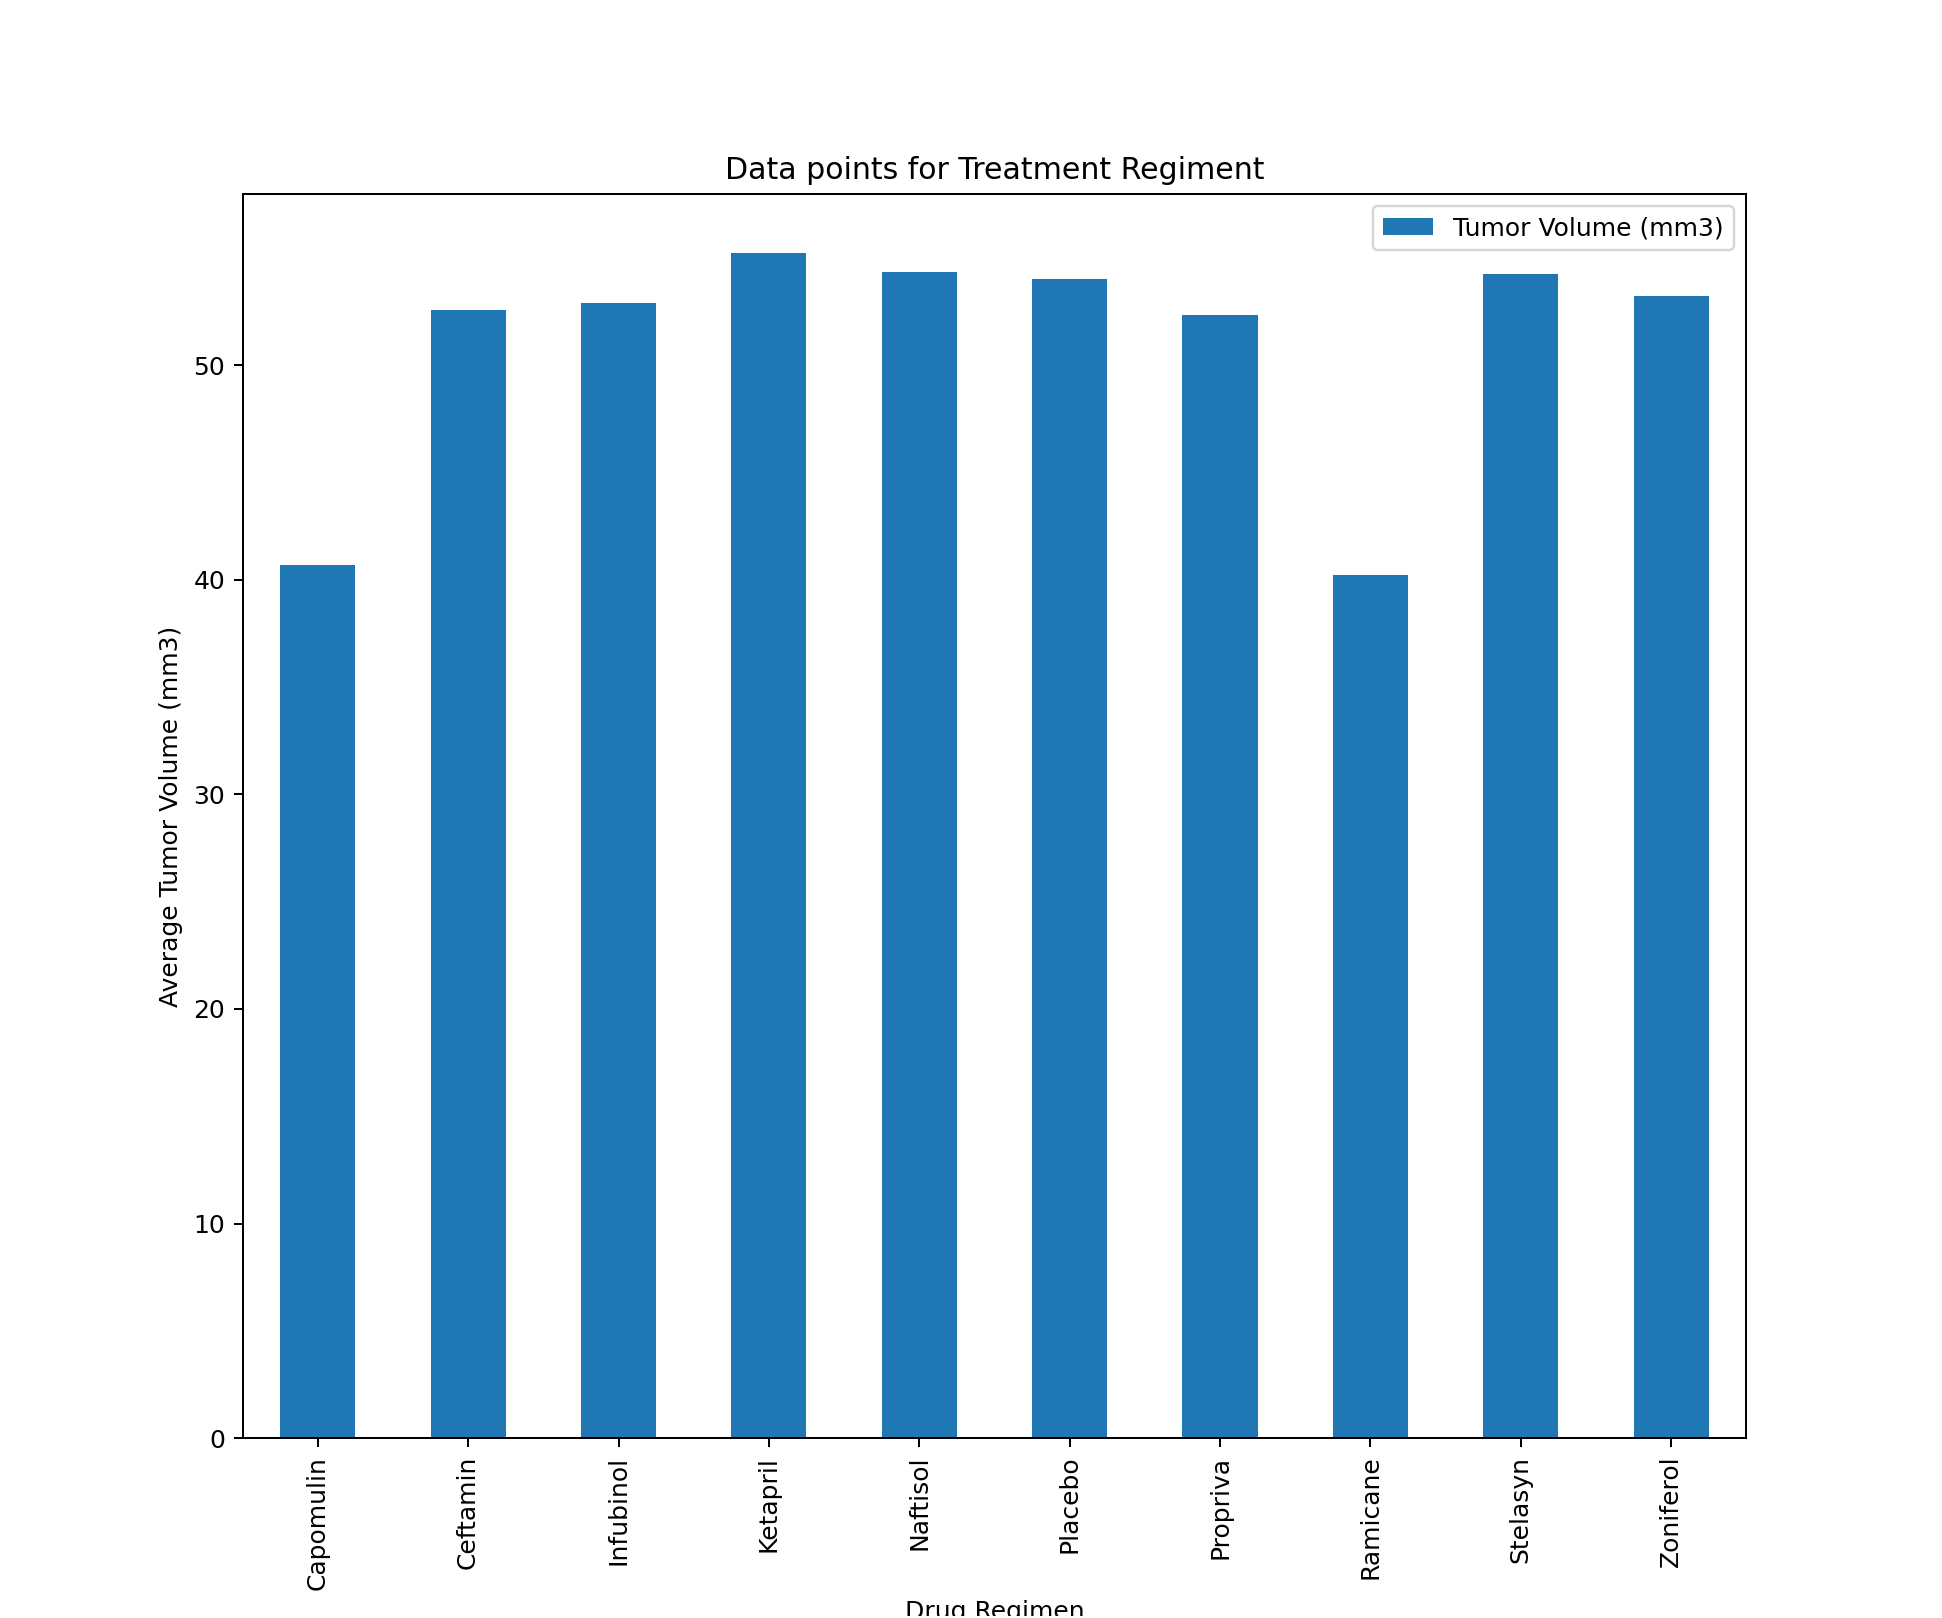

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

In [4]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
summaryDF.plot(kind="bar", figsize=(6,5))
plt.title("Data points for Treatment Regiment")
plt.xlabel("Drug Regimen")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()
plt.tight_layout

<IPython.core.display.Javascript object>


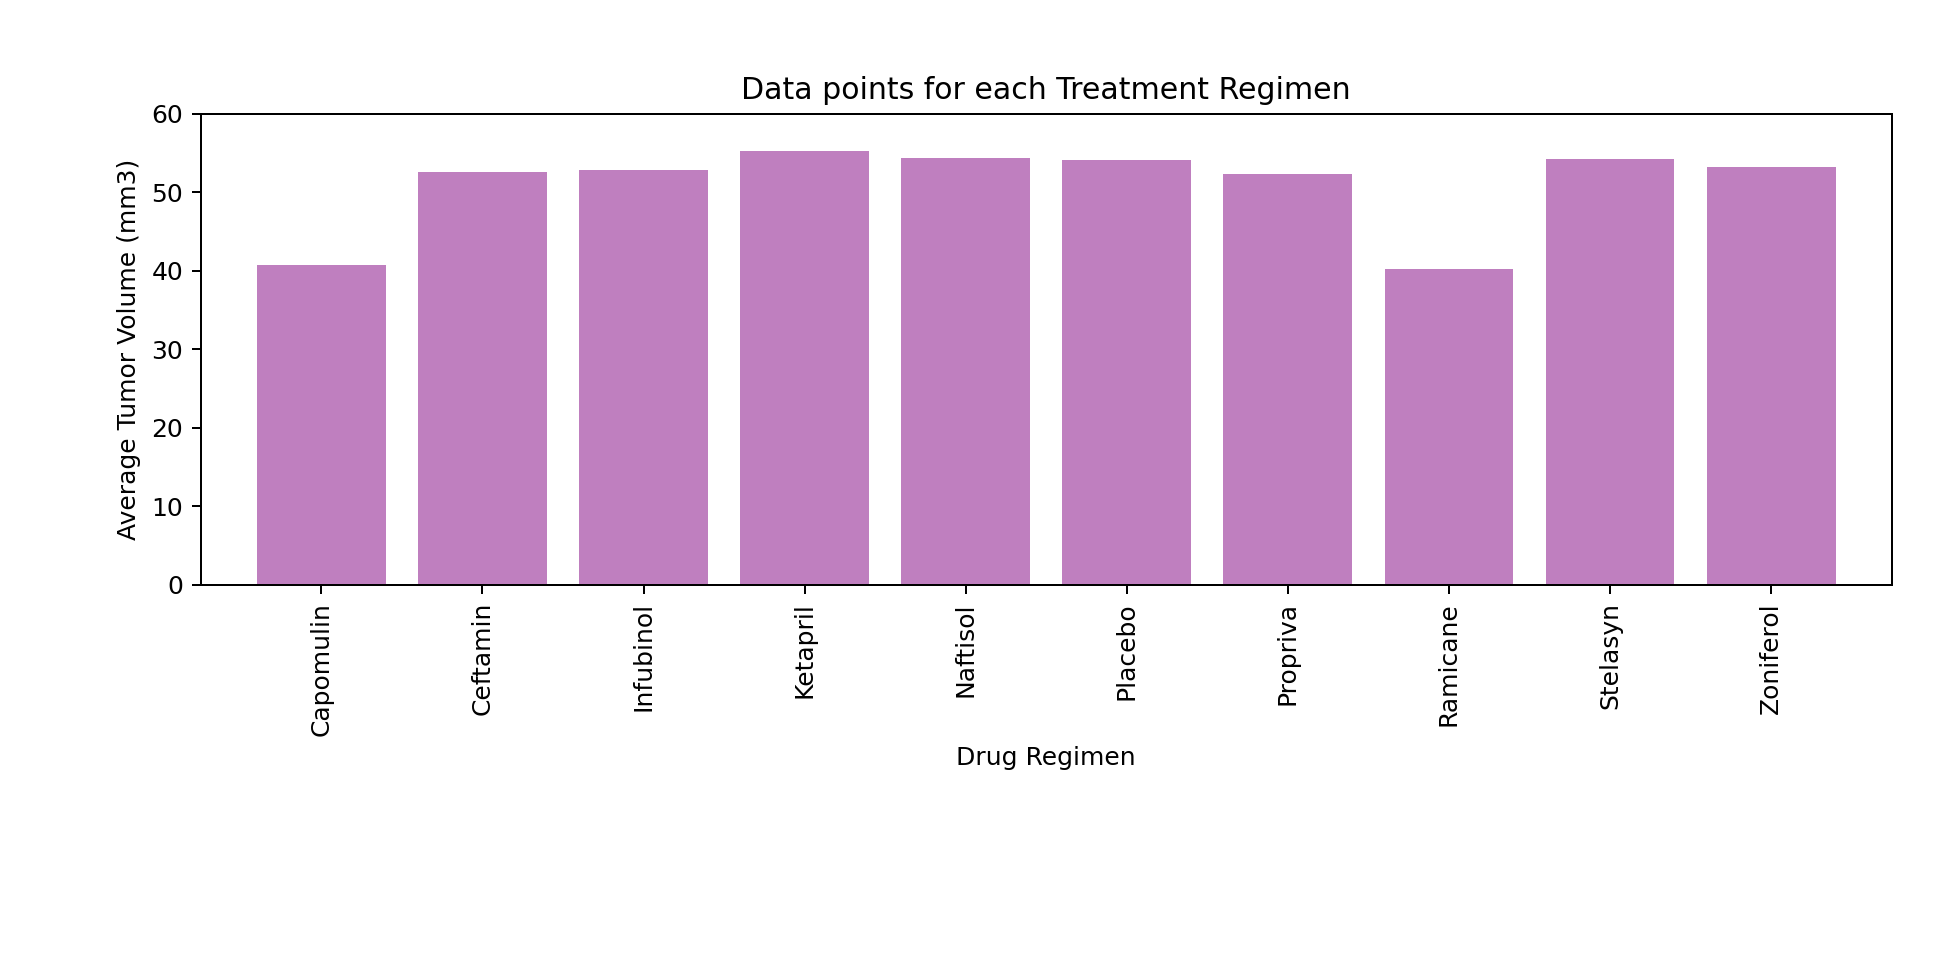

In [5]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.(X_AXIS AND TICK LOCATIONS)
xAxis = np.arange(len(summaryDF))
tickLocations = [value for value in xAxis]

plt.figure(figsize=(6, 3))
plt.bar(xAxis, summaryDF["Tumor Volume (mm3)"], color= "purple", alpha=0.5)
plt.xticks(tickLocations, list(summaryDF.index), rotation="vertical") 
plt.xlim(-0.75, len(xAxis) - 0.25)
plt.ylim(0, 60)
plt.title("Data points for each Treatment Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Average Tumor Volume (mm3)")
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


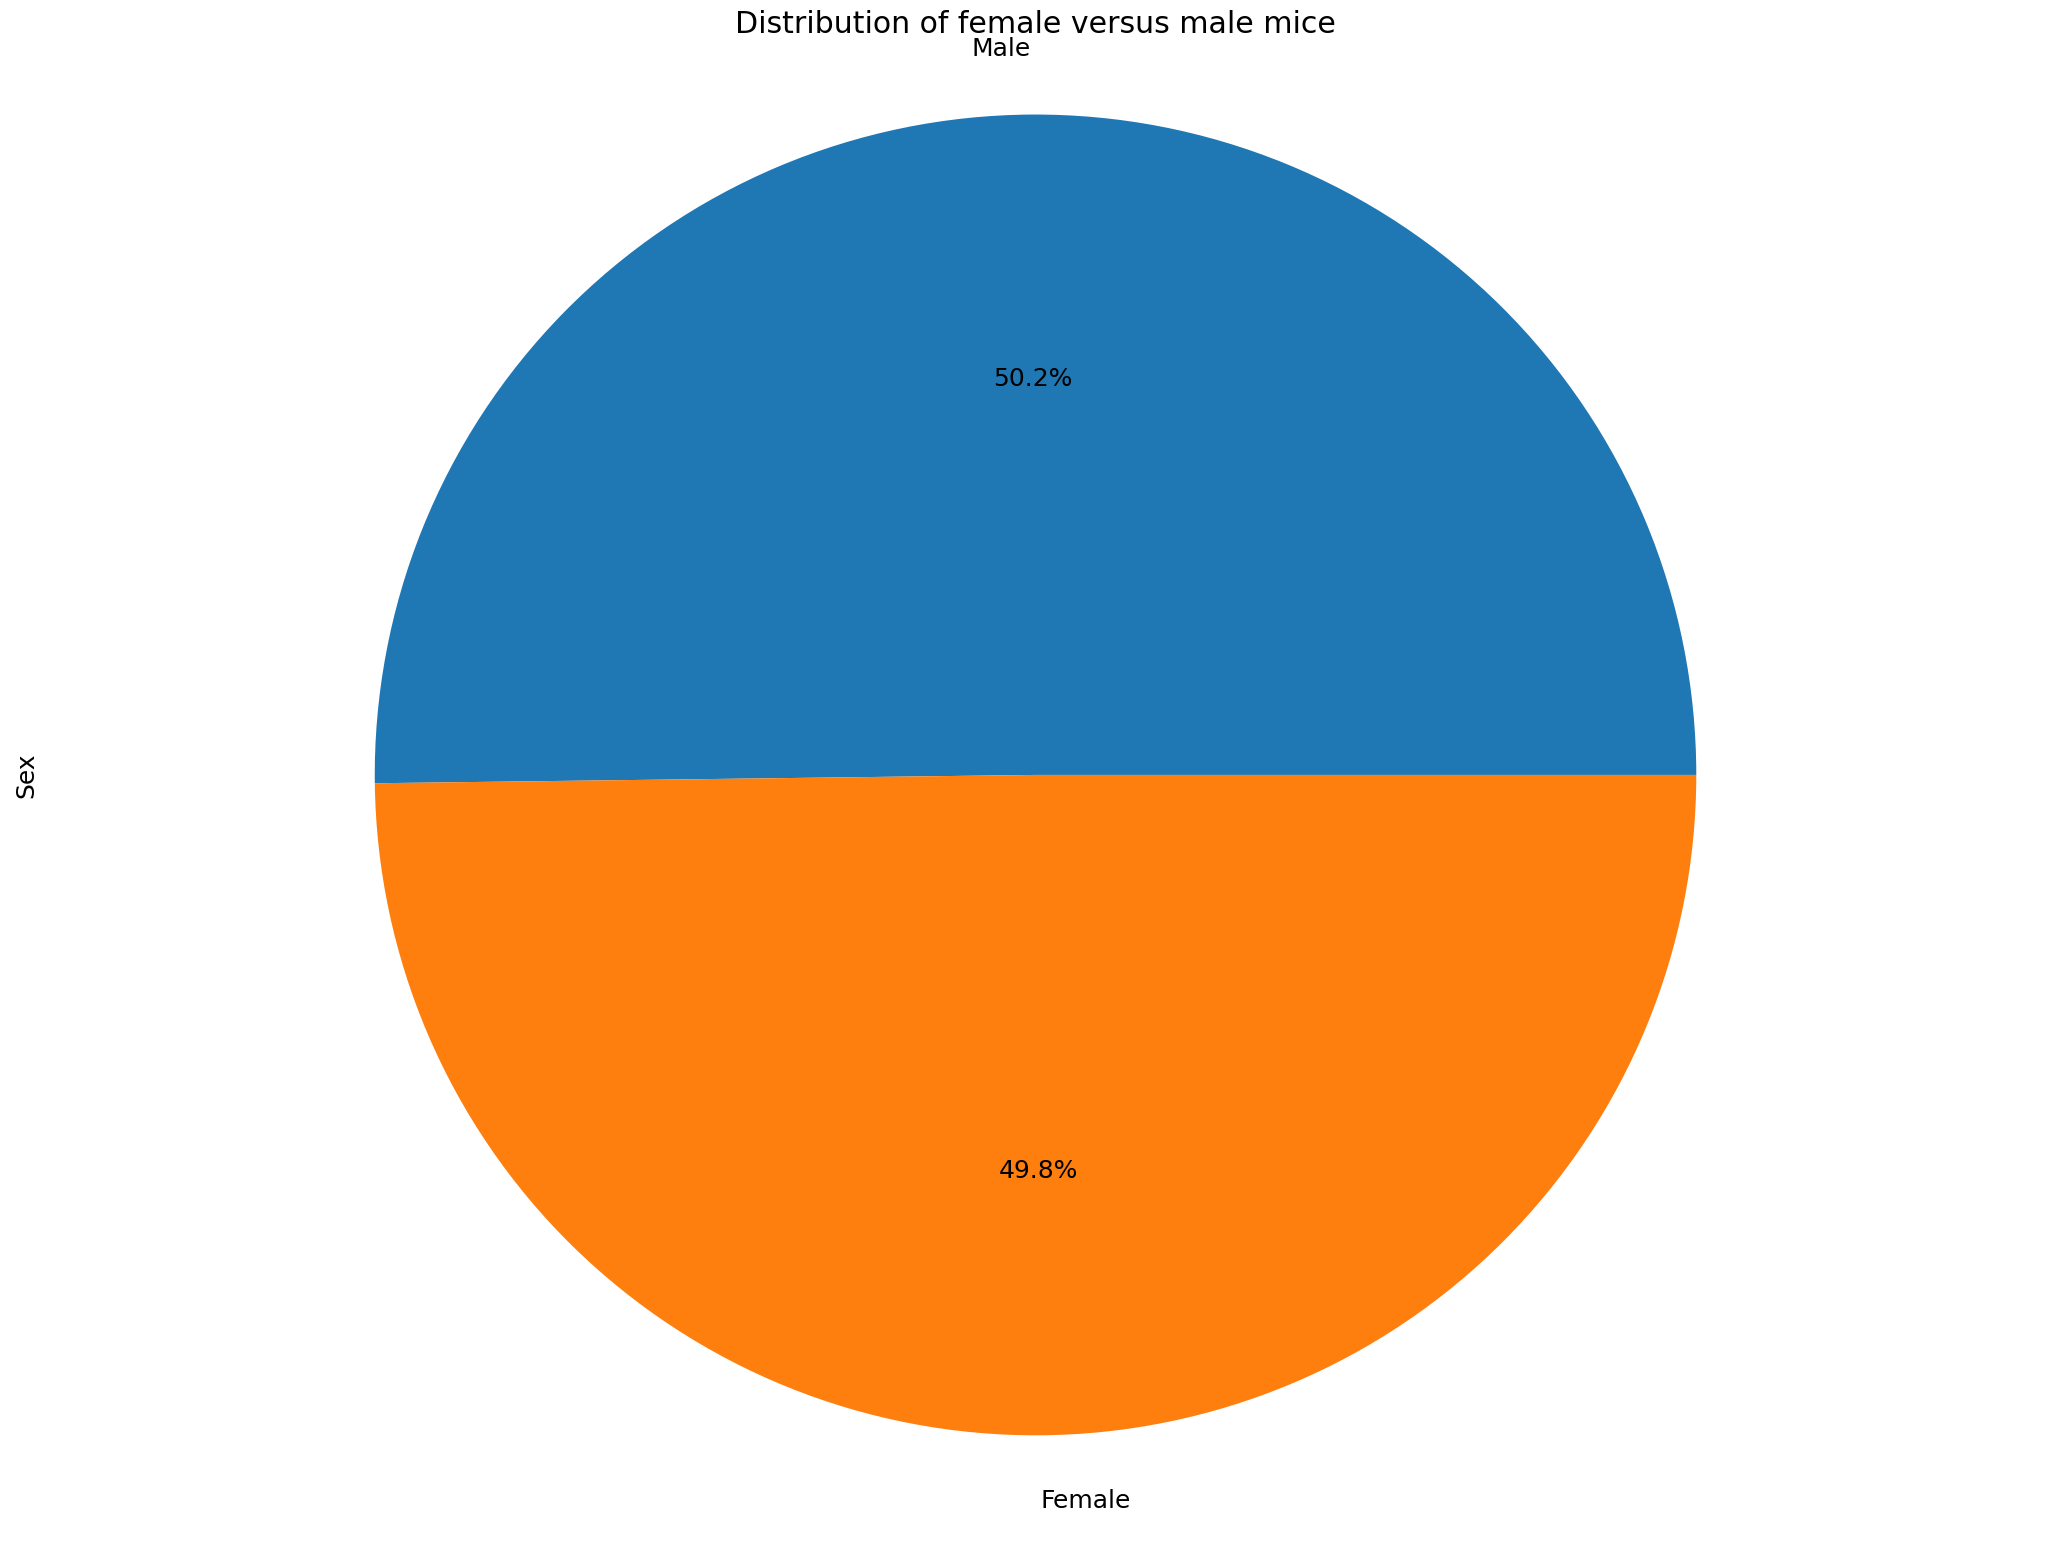

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_count = mouse_metadata["Sex"].value_counts()
plt.figure()
mice_count.plot(kind="pie", autopct="%1.1f%%")
plt.tight_layout()
plt.axis("equal")
plt.title("Distribution of female versus male mice")
plt.tight_layout

<IPython.core.display.Javascript object>


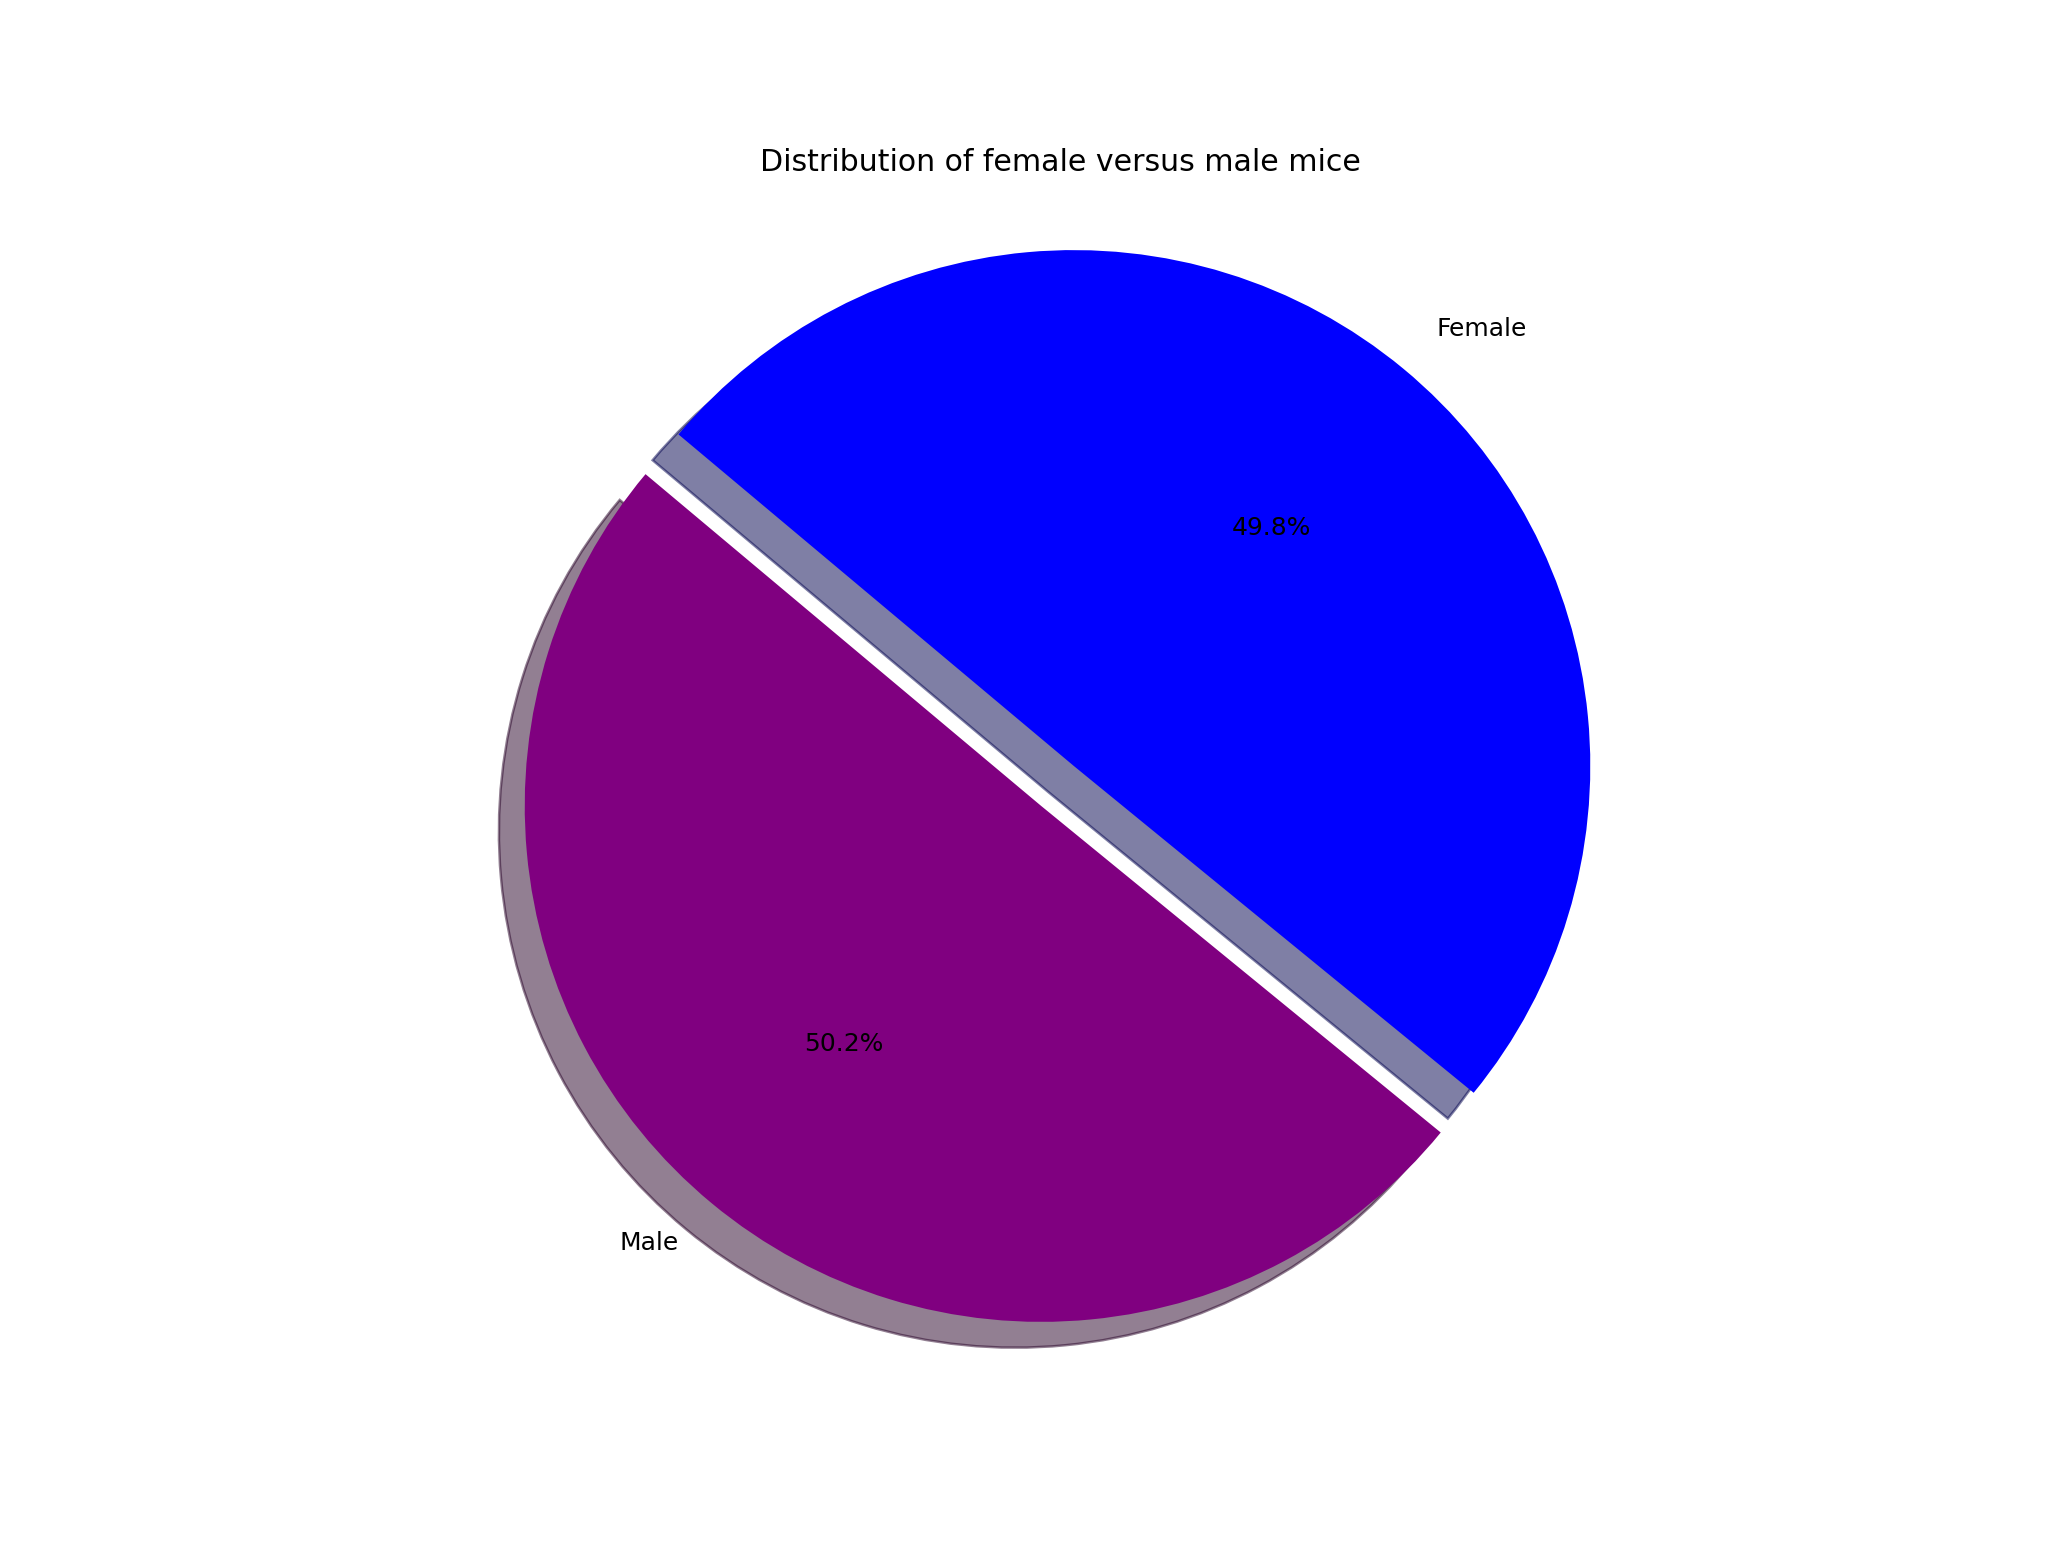

In [7]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
colors = ["Purple", "Blue"]
explode = (0.1,0)
plt.figure()
plt.pie(mice_count.values, explode=explode, labels=mice_count.index.values, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
#PERFECT CIRCLE
plt.axis("equal")
plt.title("Distribution of female versus male mice")
plt.show()

In [8]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
regimenData = mouse_clinical_combine[(mouse_clinical_combine["Drug Regimen"]=="Capomulin")|
                                    (mouse_clinical_combine["Drug Regimen"]=="Ramicane") |
                                    (mouse_clinical_combine["Drug Regimen"]=="Infubinol")|
                                    (mouse_clinical_combine["Drug Regimen"]=="Ceftamin")]
# Start by getting the last (greatest) timepoint for each mouse
#Group df with the original dataframe to get the tumor volume at the last timepoint
regimenData = regimenData[["Mouse ID", "Drug Regimen", "Tumor Volume (mm3)"]]
regimenData = regimenData.groupby(["Mouse ID", "Drug Regimen"])
regimenDF = regimenData["Tumor Volume (mm3)"].sum().to_frame()
regimenPlot= regimenDF["Tumor Volume (mm3)"]
regimenDF.head()

,,Tumor Volume (mm3)
Mouse ID,Drug Regimen,
a203,Infubinol,563.127077
a251,Infubinol,552.370946
a275,Ceftamin,527.709651
a411,Ramicane,407.013854
a444,Ramicane,430.600524


In [9]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
# Determine outliers using upper and lower bounds

quartiles = regimenPlot.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr=upperq-lowerq

print(f"The lower quartile of the Tumor Volume mm3) is:{lowerq}")
print(f"The upper quartile of the Tumor Volume mm3) is:{upperq}")
print(f"The interquartile range of the Tumor Volume mm3) is:{iqr}")
print(f"The median of the Tumor Volume mm3) is:{quartiles[0.5]}")

lower_bound = lowerq -(1.5*iqr)
upper_bound = upperq +(1.5*iqr)
print(f"Values below {lower_bound} could be outliers")
print(f"Values below {upper_bound} could be outliers")

The lower quartile of the Tumor Volume mm3) is:340.0010610275
The upper quartile of the Tumor Volume mm3) is:449.98455965499994
The interquartile range of the Tumor Volume mm3) is:109.98349862749996
The median of the Tumor Volume mm3) is:394.845840265
Values below 175.02581308625005 could be outliers
Values below 614.9598075962499 could be outliers


<IPython.core.display.Javascript object>


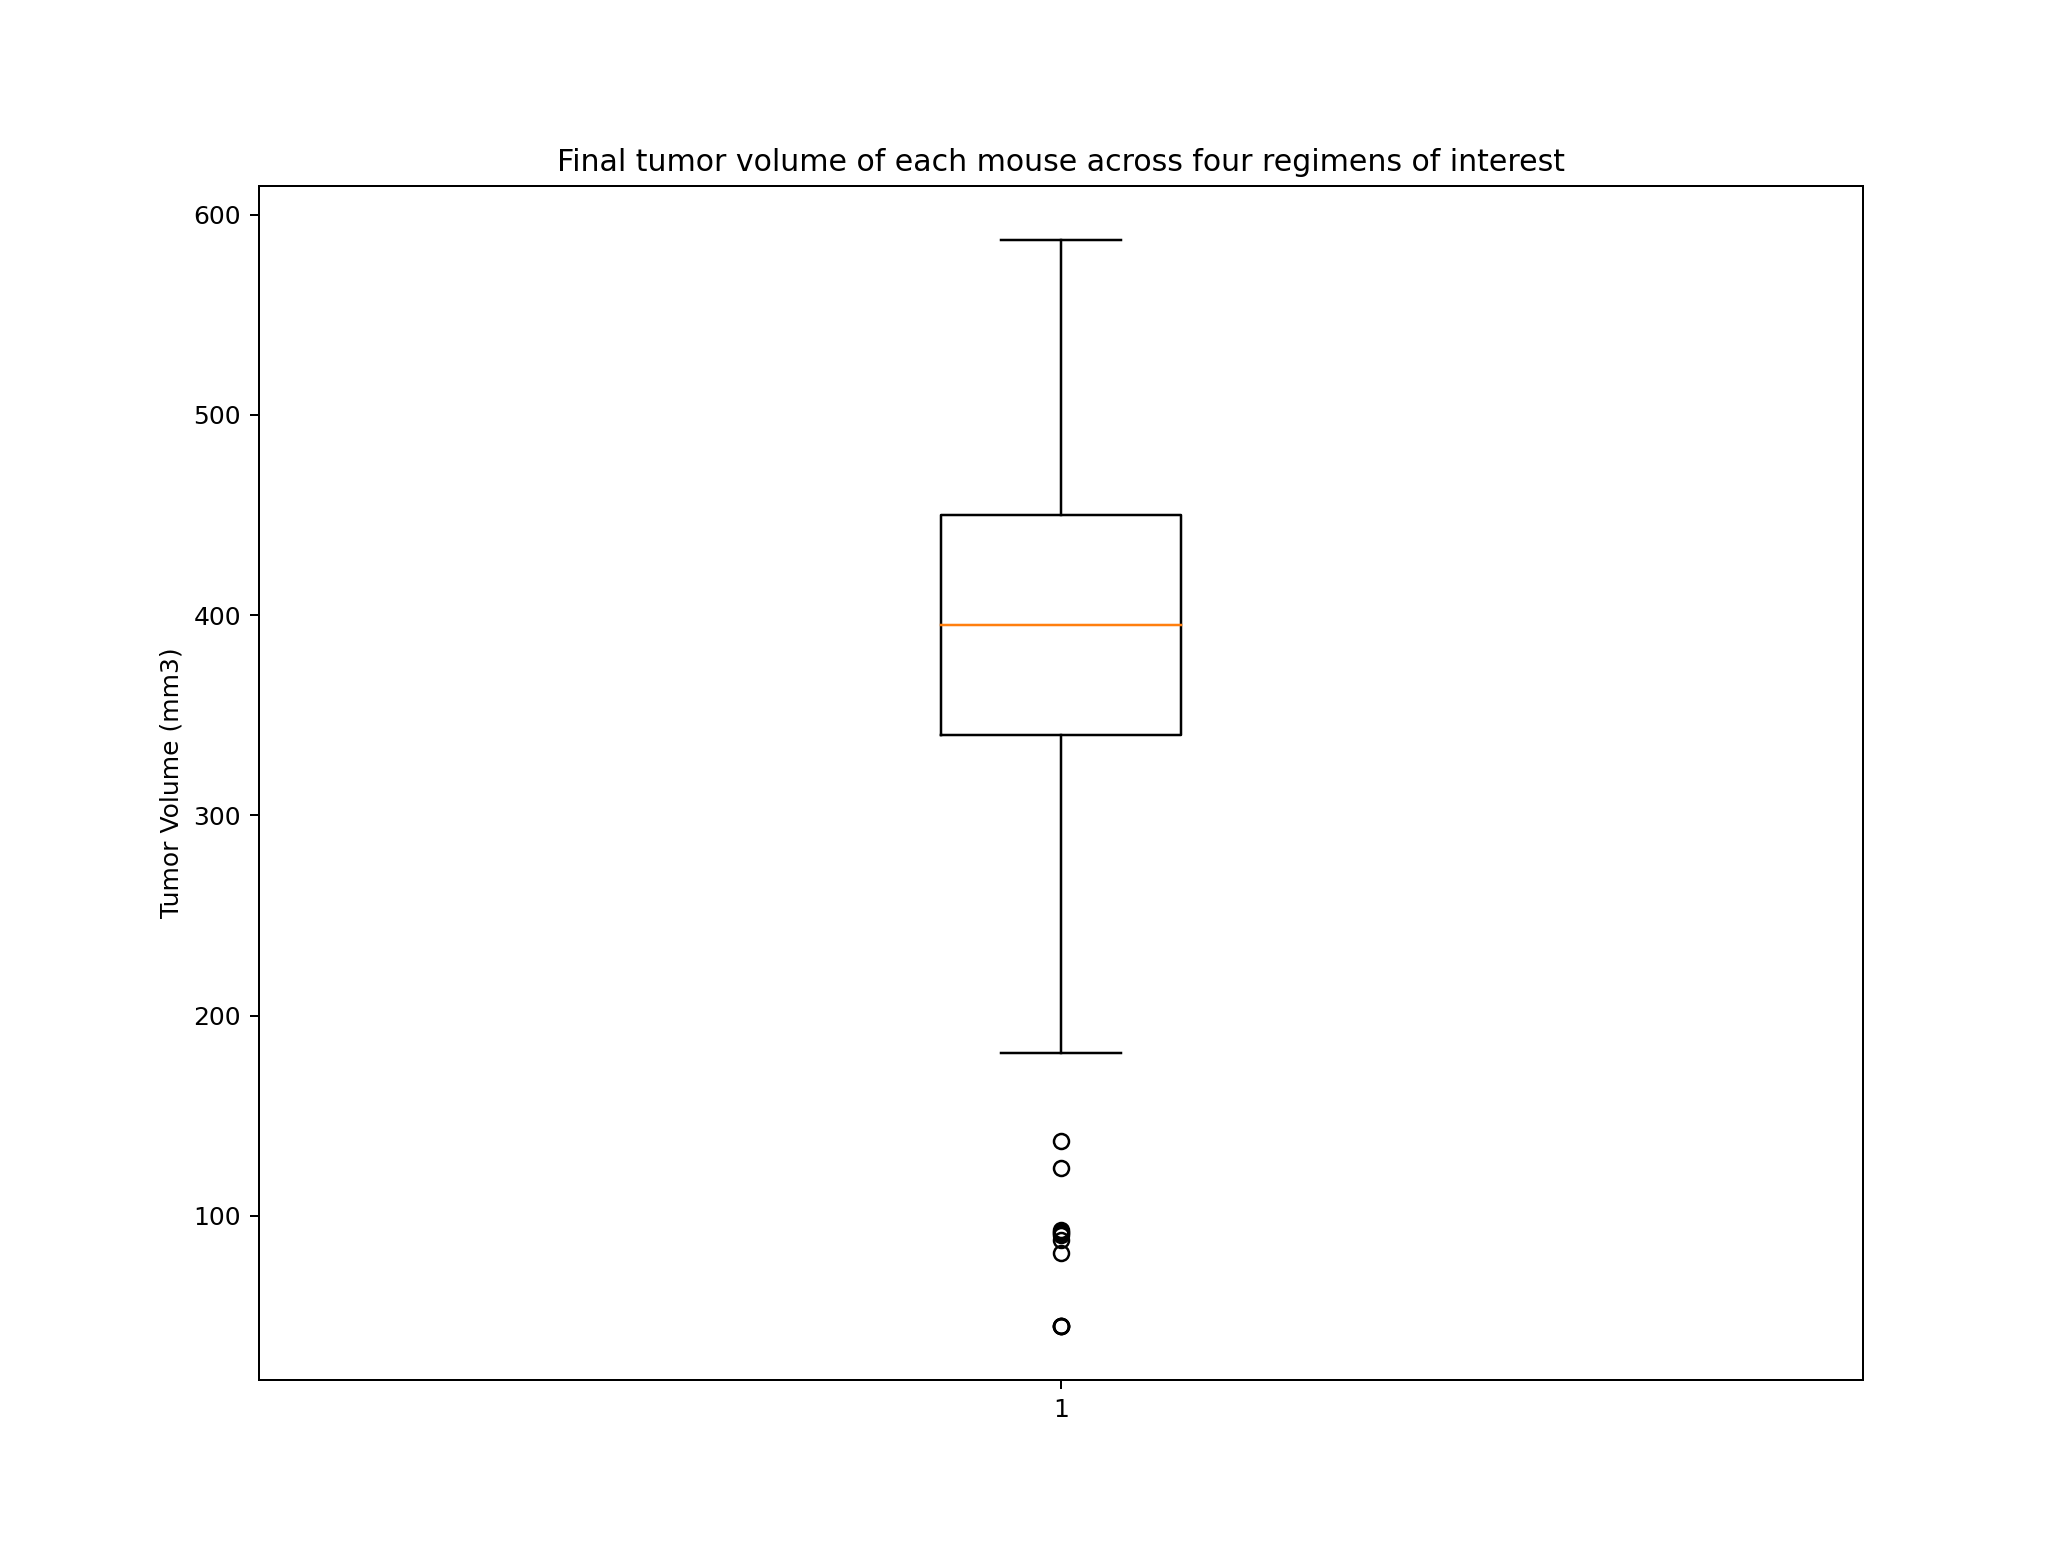

In [10]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title("Final tumor volume of each mouse across four regimens of interest")
ax1.set_ylabel("Tumor Volume (mm3)")
ax1.boxplot(regimenPlot)
plt.show()

<IPython.core.display.Javascript object>


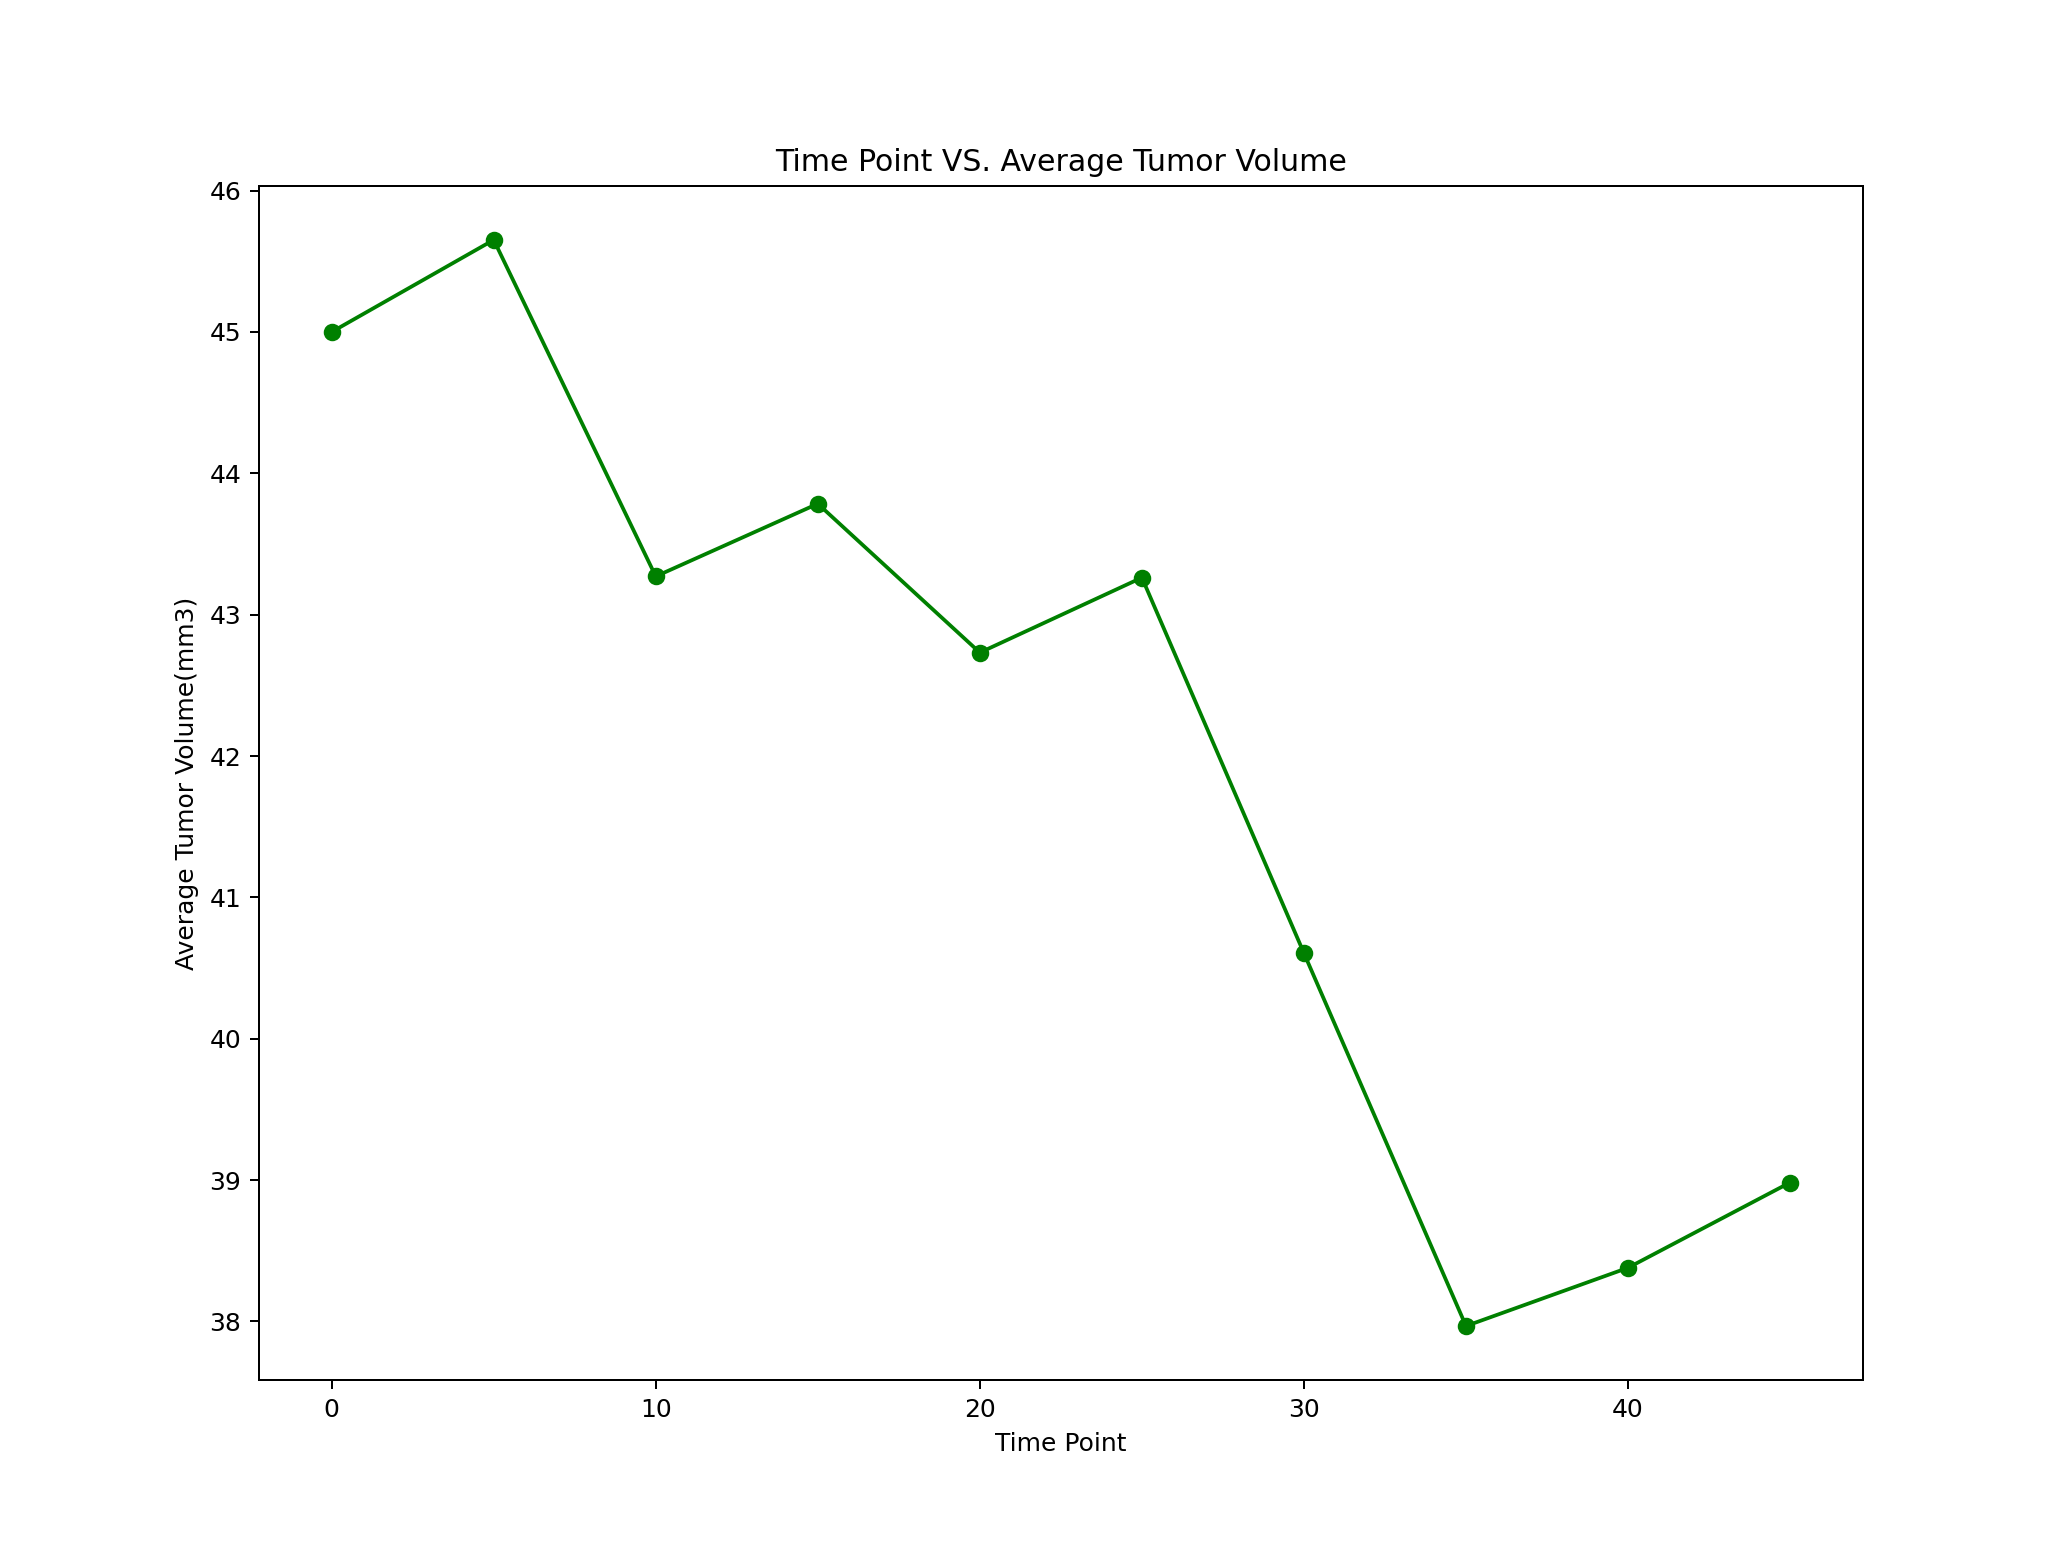

In [11]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
tumorData = mouse_clinical_combine[(mouse_clinical_combine["Drug Regimen"]=="Capomulin")& (mouse_clinical_combine["Mouse ID"]=="b128")]
tumorData = tumorData.groupby(["Drug Regimen", "Timepoint"])
tumorDataDF = tumorData["Tumor Volume (mm3)"].mean().to_frame()
tumorindexDataDF = tumorDataDF.unstack(0)
tumorPlotDF = tumorindexDataDF["Tumor Volume (mm3)"]

xAxis = [0,5,10,15,20,25,30,35,40,45]
plt.figure()
tumorTotal, =plt.plot(xAxis, tumorPlotDF["Capomulin"], marker= "o", color="green", label= "Total Tumor Volume")
plt.title("Time Point VS. Average Tumor Volume")
plt.xlabel("Time Point")
plt.ylabel("Average Tumor Volume(mm3)")
plt.show()

<IPython.core.display.Javascript object>


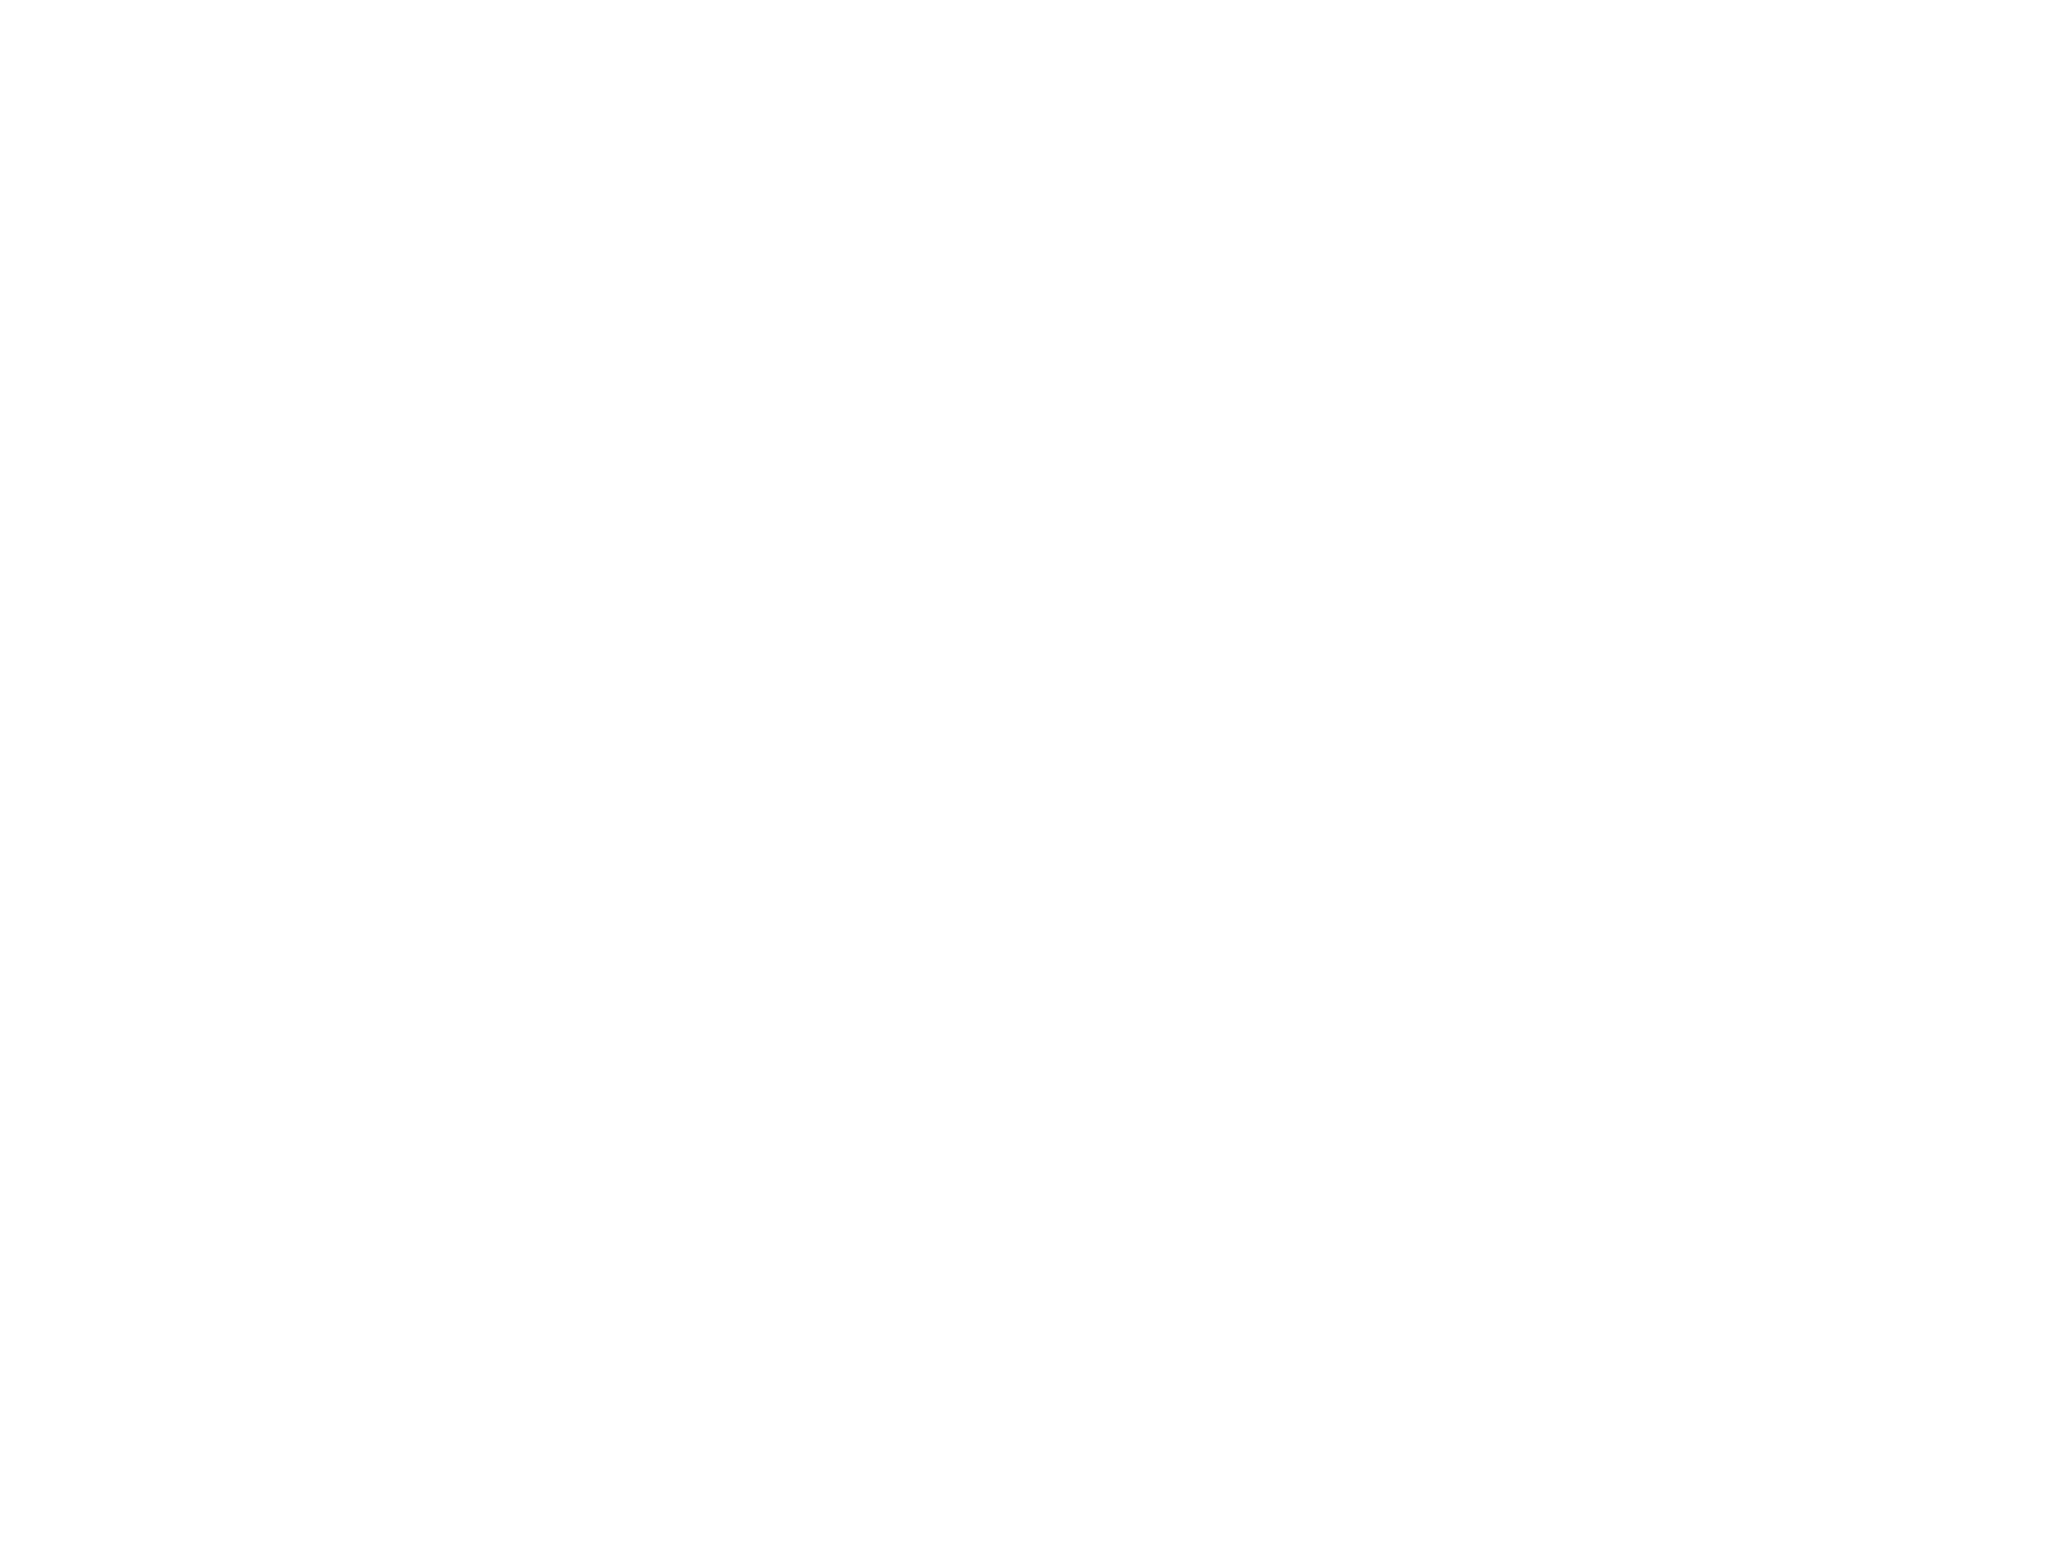

<IPython.core.display.Javascript object>


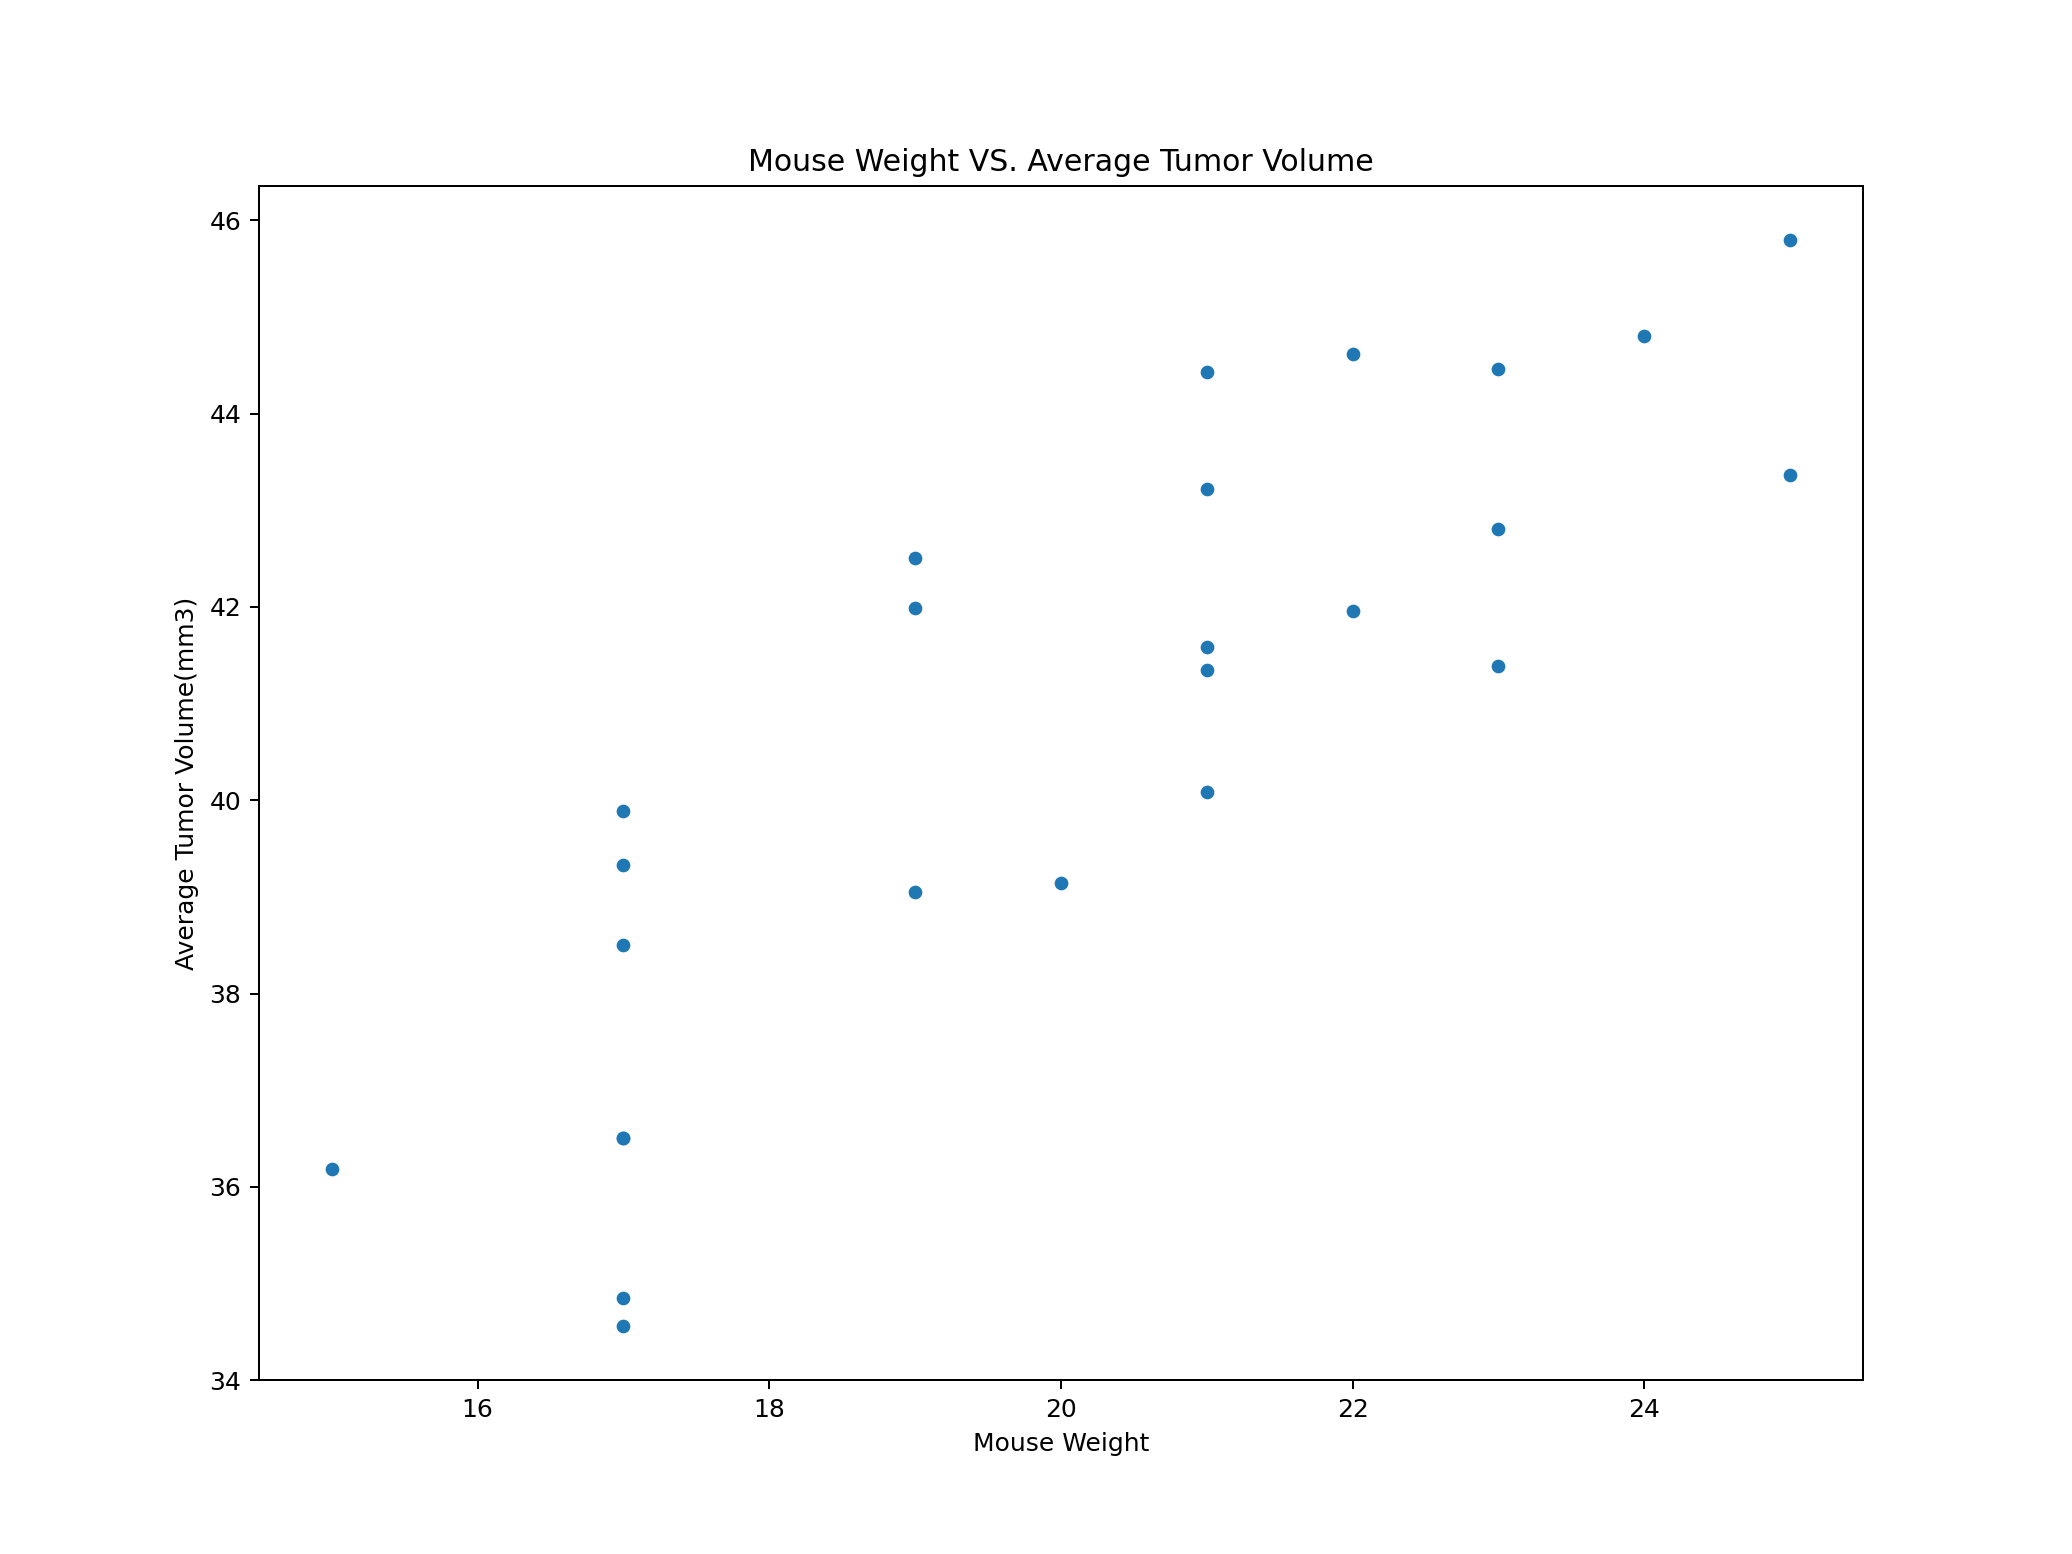

In [12]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
scatterData=mouse_clinical_combine[(mouse_clinical_combine["Drug Regimen"]=="Capomulin")]
scatterData= scatterData[["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
groupByData= scatterData.groupby(["Mouse ID", "Weight (g)"])
scatterDataDF = groupByData["Tumor Volume (mm3)"].mean().to_frame()
scatterDataDF = scatterDataDF.reset_index()

plt.figure()
scatterDataDF.plot(x="Weight (g)", y="Tumor Volume (mm3)", kind="scatter", marker="o")
plt.title("Mouse Weight VS. Average Tumor Volume")
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume(mm3)")
plt.show()

In [13]:
# Calculate the correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(scatterDataDF["Weight (g)"], scatterDataDF["Tumor Volume (mm3)"])
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


<IPython.core.display.Javascript object>


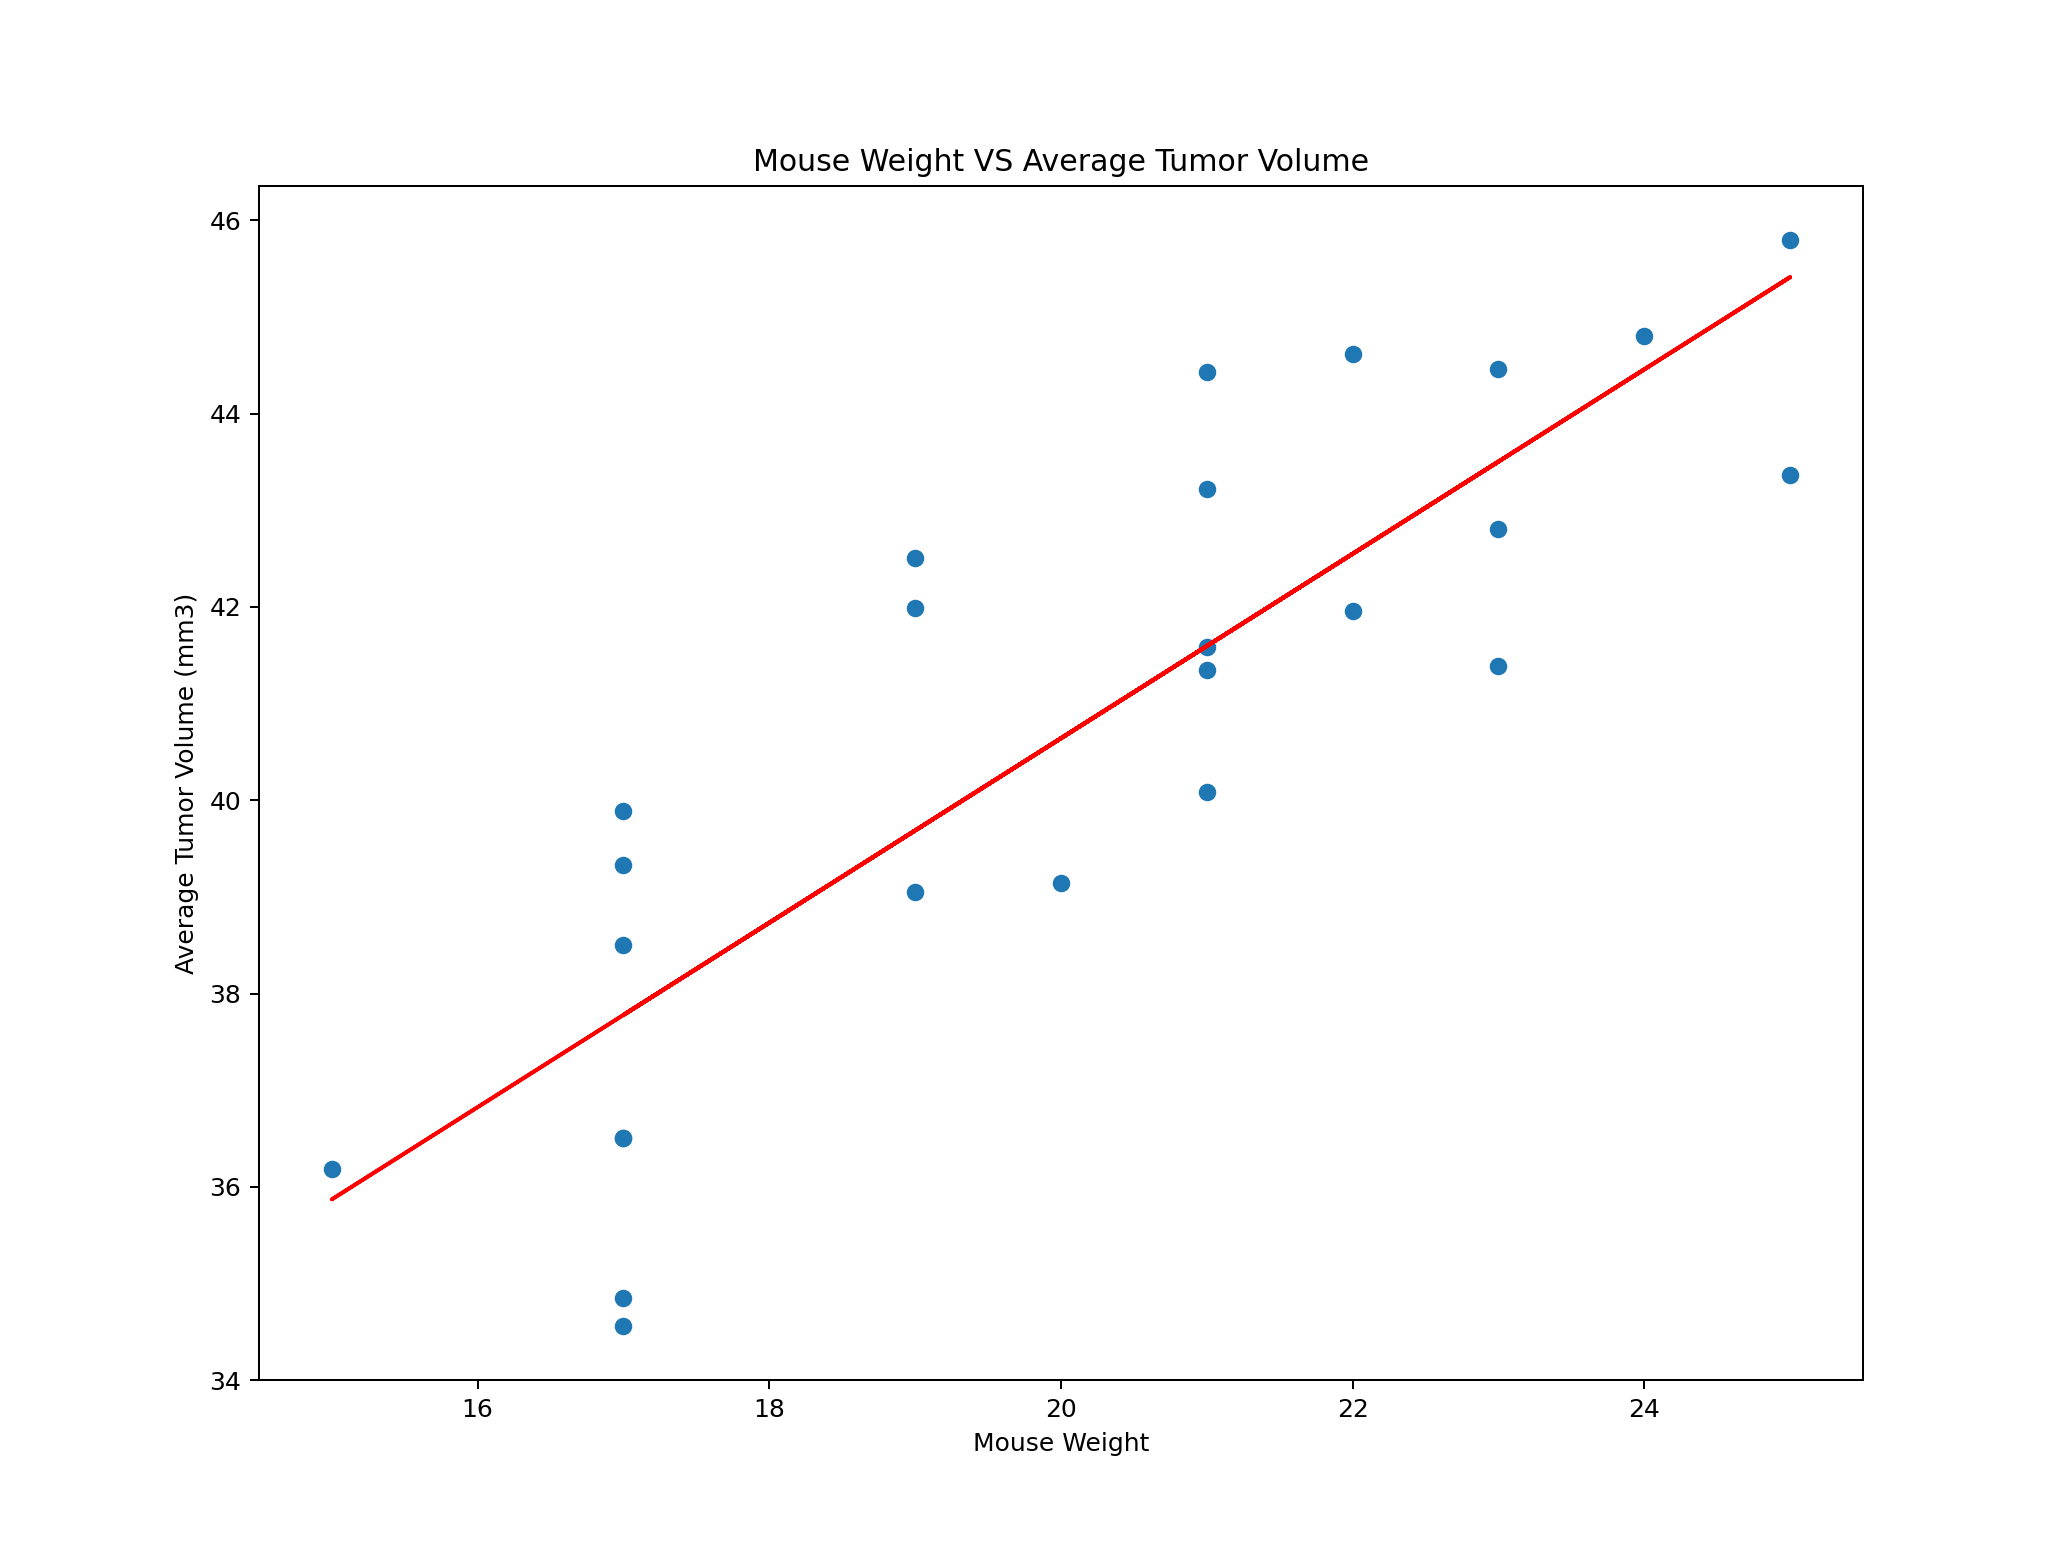

In [14]:
#Create linear regression model for mouse weight and average tumor volume for the Capomulin regimen
x_values = scatterDataDF["Weight (g)"]
y_values = scatterDataDF["Tumor Volume (mm3)"]
plt.figure()
(slope, intercept, rvalue, pvalue, stderr)= st.linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_ew = "y=" +str(round(slope,2)) +"x +" +str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.title("Mouse Weight VS Average Tumor Volume")
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()